<a href="https://colab.research.google.com/github/signofcommunication/Bible-of-Competitive-Programming/blob/main/UAS_AI_%7C_Jason_Cahyadie_Soh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install scikit-fuzzy di Google Colab
!pip install -q scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 20.4 MB/s eta 0:00:00


In [2]:
# Import library yang dibutuhkan
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
import pandas as pd

=== Sistem Pengkondisian Udara Otomatis Berbasis Fuzzy Logic ===
Masukkan nilai input untuk simulasi sistem AC Toyota Avanza:
Suhu Kabin (°C) [15-35]: 15
Suhu Lingkungan (°C) [15-40]: 20
Kelembapan (%) [30-90]: 40
Jumlah Penumpang [1-4]: 4

=== Hasil Simulasi Sistem AC Otomatis ===
 Suhu Kabin (°C)  Suhu Lingkungan (°C)  Kelembapan (%)  Jumlah Penumpang  Kecepatan Kipas (RPM) Kategori Kipas  Intensitas Pendinginan (%) Kategori Pendinginan
            15.0                  20.0            40.0               4.0                1413.49         Sedang                       13.96               Rendah


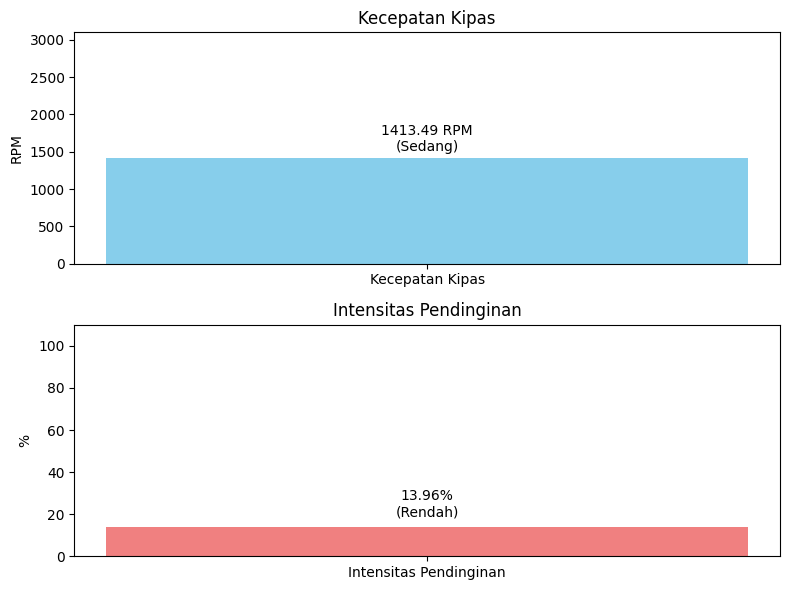

In [4]:
# 1. Definisikan Variabel Input dan Output
# Input: Suhu Kabin (°C)
suhu_kabin = ctrl.Antecedent(np.arange(15, 35, 0.1), 'suhu_kabin')
suhu_kabin['rendah'] = fuzz.trapmf(suhu_kabin.universe, [15, 15, 20, 22])
suhu_kabin['nyaman'] = fuzz.trimf(suhu_kabin.universe, [20, 23.5, 25])
suhu_kabin['tinggi'] = fuzz.trapmf(suhu_kabin.universe, [25, 27, 35, 35])

# Input: Suhu Lingkungan (°C)
suhu_lingkungan = ctrl.Antecedent(np.arange(15, 40, 0.1), 'suhu_lingkungan')
suhu_lingkungan['rendah'] = fuzz.trapmf(suhu_lingkungan.universe, [15, 15, 18, 20])
suhu_lingkungan['sedang'] = fuzz.trimf(suhu_lingkungan.universe, [18, 25, 30])
suhu_lingkungan['tinggi'] = fuzz.trapmf(suhu_lingkungan.universe, [30, 32, 40, 40])

# Input: Kelembapan (%)
kelembapan = ctrl.Antecedent(np.arange(30, 90, 0.1), 'kelembapan')
kelembapan['rendah'] = fuzz.trapmf(kelembapan.universe, [30, 30, 40, 50])
kelembapan['sedang'] = fuzz.trimf(kelembapan.universe, [40, 60, 70])
kelembapan['tinggi'] = fuzz.trapmf(kelembapan.universe, [70, 75, 90, 90])

# Input: Jumlah Penumpang
jumlah_penumpang = ctrl.Antecedent(np.arange(1, 5, 0.1), 'jumlah_penumpang')
jumlah_penumpang['sedikit'] = fuzz.trapmf(jumlah_penumpang.universe, [1, 1, 1.5, 2])
jumlah_penumpang['sedang'] = fuzz.trimf(jumlah_penumpang.universe, [2, 3, 3.5])
jumlah_penumpang['banyak'] = fuzz.trapmf(jumlah_penumpang.universe, [3.5, 4, 5, 5])

# Output: Kecepatan Kipas (RPM)
kecepatan_kipas = ctrl.Consequent(np.arange(0, 3100, 10), 'kecepatan_kipas')
kecepatan_kipas['rendah'] = fuzz.trapmf(kecepatan_kipas.universe, [0, 0, 500, 1000])
kecepatan_kipas['sedang'] = fuzz.trimf(kecepatan_kipas.universe, [800, 1500, 2000])
kecepatan_kipas['tinggi'] = fuzz.trapmf(kecepatan_kipas.universe, [2000, 2500, 3100, 3100])

# Output: Intensitas Pendinginan (%)
intensitas_pendinginan = ctrl.Consequent(np.arange(0, 110, 1), 'intensitas_pendinginan')
intensitas_pendinginan['rendah'] = fuzz.trapmf(intensitas_pendinginan.universe, [0, 0, 15, 30])
intensitas_pendinginan['sedang'] = fuzz.trimf(intensitas_pendinginan.universe, [20, 45, 60])
intensitas_pendinginan['tinggi'] = fuzz.trapmf(intensitas_pendinginan.universe, [60, 80, 110, 110])

# 2. Definisikan Aturan Fuzzy (81 Aturan)
rules = []

# Definisikan semua kombinasi aturan secara programatik berdasarkan tabel di dokumen
input_combinations = [
    ('rendah', 'rendah', 'rendah', 'sedikit', 'rendah', 'rendah'),
    ('rendah', 'rendah', 'rendah', 'sedang', 'rendah', 'rendah'),
    ('rendah', 'rendah', 'rendah', 'banyak', 'sedang', 'rendah'),
    ('rendah', 'rendah', 'sedang', 'sedikit', 'rendah', 'rendah'),
    ('rendah', 'rendah', 'sedang', 'sedang', 'rendah', 'rendah'),
    ('rendah', 'rendah', 'sedang', 'banyak', 'sedang', 'rendah'),
    ('rendah', 'rendah', 'tinggi', 'sedikit', 'sedang', 'rendah'),
    ('rendah', 'rendah', 'tinggi', 'sedang', 'sedang', 'rendah'),
    ('rendah', 'rendah', 'tinggi', 'banyak', 'tinggi', 'sedang'),
    ('rendah', 'sedang', 'rendah', 'sedikit', 'rendah', 'rendah'),
    ('rendah', 'sedang', 'rendah', 'sedang', 'rendah', 'rendah'),
    ('rendah', 'sedang', 'rendah', 'banyak', 'sedang', 'rendah'),
    ('rendah', 'sedang', 'sedang', 'sedikit', 'rendah', 'rendah'),
    ('rendah', 'sedang', 'sedang', 'sedang', 'rendah', 'rendah'),
    ('rendah', 'sedang', 'sedang', 'banyak', 'sedang', 'rendah'),
    ('rendah', 'sedang', 'tinggi', 'sedikit', 'sedang', 'rendah'),
    ('rendah', 'sedang', 'tinggi', 'sedang', 'sedang', 'rendah'),
    ('rendah', 'sedang', 'tinggi', 'banyak', 'tinggi', 'sedang'),
    ('rendah', 'tinggi', 'rendah', 'sedikit', 'sedang', 'rendah'),
    ('rendah', 'tinggi', 'rendah', 'sedang', 'sedang', 'rendah'),
    ('rendah', 'tinggi', 'rendah', 'banyak', 'tinggi', 'sedang'),
    ('rendah', 'tinggi', 'sedang', 'sedikit', 'sedang', 'rendah'),
    ('rendah', 'tinggi', 'sedang', 'sedang', 'sedang', 'rendah'),
    ('rendah', 'tinggi', 'sedang', 'banyak', 'tinggi', 'sedang'),
    ('rendah', 'tinggi', 'tinggi', 'sedikit', 'tinggi', 'sedang'),
    ('rendah', 'tinggi', 'tinggi', 'sedang', 'tinggi', 'sedang'),
    ('rendah', 'tinggi', 'tinggi', 'banyak', 'tinggi', 'tinggi'),
    ('nyaman', 'rendah', 'rendah', 'sedikit', 'rendah', 'rendah'),
    ('nyaman', 'rendah', 'rendah', 'sedang', 'rendah', 'rendah'),
    ('nyaman', 'rendah', 'rendah', 'banyak', 'sedang', 'rendah'),
    ('nyaman', 'rendah', 'sedang', 'sedikit', 'rendah', 'rendah'),
    ('nyaman', 'rendah', 'sedang', 'sedang', 'rendah', 'rendah'),
    ('nyaman', 'rendah', 'sedang', 'banyak', 'sedang', 'rendah'),
    ('nyaman', 'rendah', 'tinggi', 'sedikit', 'sedang', 'rendah'),
    ('nyaman', 'rendah', 'tinggi', 'sedang', 'sedang', 'rendah'),
    ('nyaman', 'rendah', 'tinggi', 'banyak', 'tinggi', 'sedang'),
    ('nyaman', 'sedang', 'rendah', 'sedikit', 'rendah', 'rendah'),
    ('nyaman', 'sedang', 'rendah', 'sedang', 'rendah', 'rendah'),
    ('nyaman', 'sedang', 'rendah', 'banyak', 'sedang', 'rendah'),
    ('nyaman', 'sedang', 'sedang', 'sedikit', 'rendah', 'rendah'),
    ('nyaman', 'sedang', 'sedang', 'sedang', 'rendah', 'rendah'),
    ('nyaman', 'sedang', 'sedang', 'banyak', 'sedang', 'rendah'),
    ('nyaman', 'sedang', 'tinggi', 'sedikit', 'sedang', 'rendah'),
    ('nyaman', 'sedang', 'tinggi', 'sedang', 'sedang', 'rendah'),
    ('nyaman', 'sedang', 'tinggi', 'banyak', 'tinggi', 'sedang'),
    ('nyaman', 'tinggi', 'rendah', 'sedikit', 'sedang', 'rendah'),
    ('nyaman', 'tinggi', 'rendah', 'sedang', 'sedang', 'rendah'),
    ('nyaman', 'tinggi', 'rendah', 'banyak', 'tinggi', 'sedang'),
    ('nyaman', 'tinggi', 'sedang', 'sedikit', 'sedang', 'rendah'),
    ('nyaman', 'tinggi', 'sedang', 'sedang', 'sedang', 'rendah'),
    ('nyaman', 'tinggi', 'sedang', 'banyak', 'tinggi', 'sedang'),
    ('nyaman', 'tinggi', 'tinggi', 'sedikit', 'tinggi', 'sedang'),
    ('nyaman', 'tinggi', 'tinggi', 'sedang', 'tinggi', 'sedang'),
    ('nyaman', 'tinggi', 'tinggi', 'banyak', 'tinggi', 'tinggi'),
    ('tinggi', 'rendah', 'rendah', 'sedikit', 'sedang', 'sedang'),
    ('tinggi', 'rendah', 'rendah', 'sedang', 'sedang', 'sedang'),
    ('tinggi', 'rendah', 'rendah', 'banyak', 'tinggi', 'tinggi'),
    ('tinggi', 'rendah', 'sedang', 'sedikit', 'sedang', 'sedang'),
    ('tinggi', 'rendah', 'sedang', 'sedang', 'sedang', 'sedang'),
    ('tinggi', 'rendah', 'sedang', 'banyak', 'tinggi', 'tinggi'),
    ('tinggi', 'rendah', 'tinggi', 'sedikit', 'tinggi', 'tinggi'),
    ('tinggi', 'rendah', 'tinggi', 'sedang', 'tinggi', 'tinggi'),
    ('tinggi', 'rendah', 'tinggi', 'banyak', 'tinggi', 'tinggi'),
    ('tinggi', 'sedang', 'rendah', 'sedikit', 'sedang', 'sedang'),
    ('tinggi', 'sedang', 'rendah', 'sedang', 'sedang', 'sedang'),
    ('tinggi', 'sedang', 'rendah', 'banyak', 'tinggi', 'tinggi'),
    ('tinggi', 'sedang', 'sedang', 'sedikit', 'sedang', 'sedang'),
    ('tinggi', 'sedang', 'sedang', 'sedang', 'tinggi', 'tinggi'),
    ('tinggi', 'sedang', 'sedang', 'banyak', 'tinggi', 'tinggi'),
    ('tinggi', 'sedang', 'tinggi', 'sedikit', 'tinggi', 'tinggi'),
    ('tinggi', 'sedang', 'tinggi', 'sedang', 'tinggi', 'tinggi'),
    ('tinggi', 'sedang', 'tinggi', 'banyak', 'tinggi', 'tinggi'),
    ('tinggi', 'tinggi', 'rendah', 'sedikit', 'sedang', 'tinggi'),
    ('tinggi', 'tinggi', 'rendah', 'sedang', 'tinggi', 'tinggi'),
    ('tinggi', 'tinggi', 'rendah', 'banyak', 'tinggi', 'tinggi'),
    ('tinggi', 'tinggi', 'sedang', 'sedikit', 'tinggi', 'tinggi'),
    ('tinggi', 'tinggi', 'sedang', 'sedang', 'tinggi', 'tinggi'),
    ('tinggi', 'tinggi', 'sedang', 'banyak', 'tinggi', 'tinggi'),
    ('tinggi', 'tinggi', 'tinggi', 'sedikit', 'tinggi', 'tinggi'),
    ('tinggi', 'tinggi', 'tinggi', 'sedang', 'tinggi', 'tinggi'),
    ('tinggi', 'tinggi', 'tinggi', 'banyak', 'tinggi', 'tinggi'),
]

for sk, sl, k, jp, kk, ip in input_combinations:
    rule = ctrl.Rule(suhu_kabin[sk] & suhu_lingkungan[sl] & kelembapan[k] & jumlah_penumpang[jp],
                     (kecepatan_kipas[kk], intensitas_pendinginan[ip]))
    rules.append(rule)

# 3. Buat Sistem Kontrol Fuzzy
ac_ctrl = ctrl.ControlSystem(rules)
ac_sim = ctrl.ControlSystemSimulation(ac_ctrl)

# 4. Input dari Pengguna
print("=== Sistem Pengkondisian Udara Otomatis Berbasis Fuzzy Logic ===")
print("Masukkan nilai input untuk simulasi sistem AC Toyota Avanza:")

# Validasi input pengguna
while True:
    try:
        suhu_kabin_input = float(input("Suhu Kabin (°C) [15-35]: "))
        if 15 <= suhu_kabin_input <= 35:
            break
        else:
            print("Suhu Kabin harus antara 15 dan 35°C.")
    except ValueError:
        print("Masukkan angka yang valid.")

while True:
    try:
        suhu_lingkungan_input = float(input("Suhu Lingkungan (°C) [15-40]: "))
        if 15 <= suhu_lingkungan_input <= 40:
            break
        else:
            print("Suhu Lingkungan harus antara 15 dan 40°C.")
    except ValueError:
        print("Masukkan angka yang valid.")

while True:
    try:
        kelembapan_input = float(input("Kelembapan (%) [30-90]: "))
        if 30 <= kelembapan_input <= 90:
            break
        else:
            print("Kelembapan harus antara 30 dan 90%.")
    except ValueError:
        print("Masukkan angka yang valid.")

while True:
    try:
        jumlah_penumpang_input = float(input("Jumlah Penumpang [1-4]: "))
        if 1 <= jumlah_penumpang_input <= 4:
            break
        else:
            print("Jumlah Penumpang harus antara 1 dan 4.")
    except ValueError:
        print("Masukkan angka yang valid.")

# 5. Simulasi Berdasarkan Input Pengguna
ac_sim.input['suhu_kabin'] = suhu_kabin_input
ac_sim.input['suhu_lingkungan'] = suhu_lingkungan_input
ac_sim.input['kelembapan'] = kelembapan_input
ac_sim.input['jumlah_penumpang'] = jumlah_penumpang_input

# Hitung output
ac_sim.compute()

# Dapatkan hasil
kecepatan_kipas_output = round(ac_sim.output['kecepatan_kipas'], 2)
intensitas_pendinginan_output = round(ac_sim.output['intensitas_pendinginan'], 2)

# 6. Pengkategorian Hasil Defuzzifikasi
# Kategori Kecepatan Kipas
if 0 <= kecepatan_kipas_output <= 1000:
    kategori_kipas = "Rendah"
elif 1000 < kecepatan_kipas_output <= 2000:
    kategori_kipas = "Sedang"
else:
    kategori_kipas = "Tinggi"

# Kategori Intensitas Pendinginan
if 0 <= intensitas_pendinginan_output <= 30:
    kategori_pendinginan = "Rendah"
elif 30 < intensitas_pendinginan_output <= 60:
    kategori_pendinginan = "Sedang"
else:
    kategori_pendinginan = "Tinggi"

# 7. Tampilkan Hasil dalam Tabel
results = [{
    'Suhu Kabin (°C)': suhu_kabin_input,
    'Suhu Lingkungan (°C)': suhu_lingkungan_input,
    'Kelembapan (%)': kelembapan_input,
    'Jumlah Penumpang': jumlah_penumpang_input,
    'Kecepatan Kipas (RPM)': kecepatan_kipas_output,
    'Kategori Kipas': kategori_kipas,
    'Intensitas Pendinginan (%)': intensitas_pendinginan_output,
    'Kategori Pendinginan': kategori_pendinginan
}]

df_results = pd.DataFrame(results)
print("\n=== Hasil Simulasi Sistem AC Otomatis ===")
print(df_results.to_string(index=False))

# 8. Visualisasi Hasil Simulasi
plt.figure(figsize=(8, 6))

# Bar chart untuk Kecepatan Kipas
plt.subplot(2, 1, 1)
plt.bar(['Kecepatan Kipas'], [kecepatan_kipas_output], color='skyblue')
plt.title('Kecepatan Kipas')
plt.ylabel('RPM')
plt.ylim(0, 3100)
plt.text(0, kecepatan_kipas_output + 100, f"{kecepatan_kipas_output} RPM\n({kategori_kipas})", ha='center')

# Bar chart untuk Intensitas Pendinginan
plt.subplot(2, 1, 2)
plt.bar(['Intensitas Pendinginan'], [intensitas_pendinginan_output], color='lightcoral')
plt.title('Intensitas Pendinginan')
plt.ylabel('%')
plt.ylim(0, 110)
plt.text(0, intensitas_pendinginan_output + 5, f"{intensitas_pendinginan_output}%\n({kategori_pendinginan})", ha='center')

plt.tight_layout()
plt.show()